# <center> Open Project :<br> <small>Réda DEHAK<br> December, 2022 <br> Deadline:  January 15th 23h59 </small></center>

# Part 1:

The dataset for training and testing your methods can be downloaded from the Teams group or on the UCI website https://archive.ics.uci.edu/ml/datasets/Air+Quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

### Attributes Information:

    0- Date (DD/MM/YYYY) 
    1- Time (HH.MM.SS) 
    2- True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
    4- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
    7- True hourly averaged NOx concentration in ppb (reference analyzer) 
    8- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
    10- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
    11- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12- Temperature in Â°C 
    13- Relative Humidity (%) 
    14- AH Absolute Humidity 

- Propose a solution to predict the ground truth parameters using the other sensor responses features? 

- Demonstrate that there is a relationship (linear or nolinear) between these parameters?

## Data Loading and pre processing

In [1]:
import pandas as pd
import os

# Load the dataset from the CSV file
file_path = './Part1data/AirQualityUCI.csv'  
df = pd.read_csv(file_path, sep=';', decimal=',', na_values=-200)

# Drop the last unnamed columns
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Replace ',' with '.' in numerical columns and convert them to float
for col in df.columns[2:]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Drop rows with NaN values
df = df.dropna()

# Drop 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Display the first few rows of the cleaned dataset
print(df.head())
print(df.info())


   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 13 columns):
 #   Column         Non-Null Count

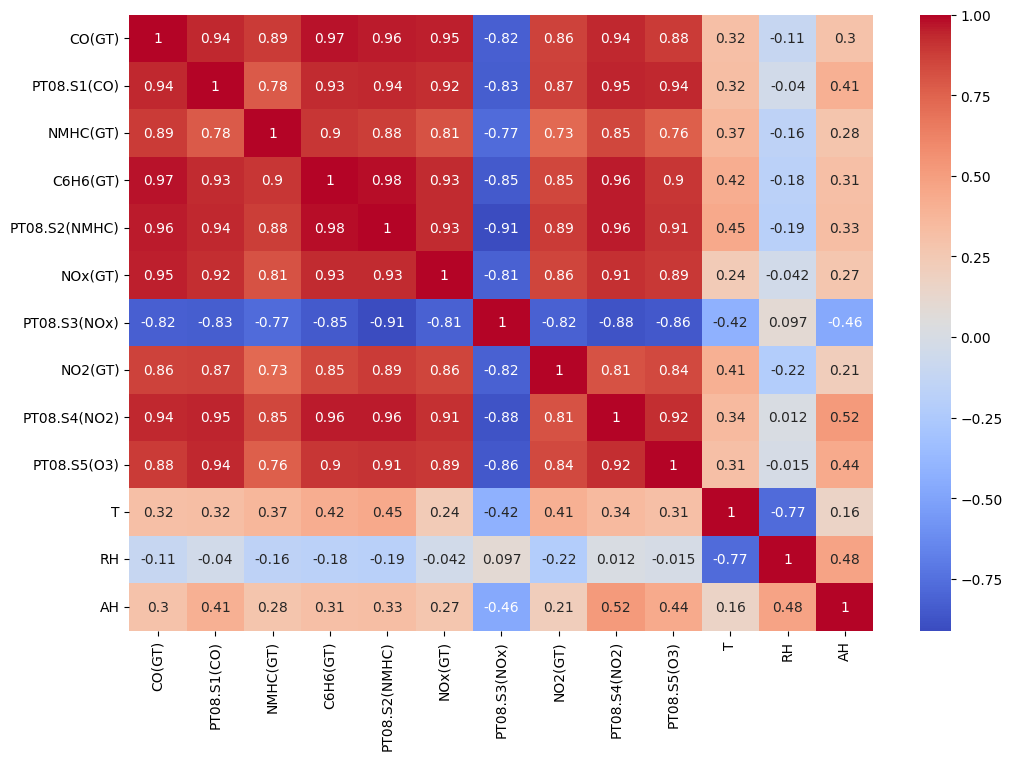

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target variables
X = df.drop(['CO(GT)', 'C6H6(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)
y = df[['CO(GT)', 'C6H6(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the linear regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the random forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}")


Linear Regression MAE: 17.963990889812333, MSE: 1654.120739812676, R2: 0.912700504071687
Random Forest MAE: 11.919208433734939, MSE: 729.3156430084334, R2: 0.9402034277871947


After the evaluation of the two models we can see 

### Model Comparison:

The Random Forest model outperforms the Linear Regression model in all key performance metrics (MAE, MSE, and R²). This suggests that Random Forest captures the underlying patterns in the data more effectively than Linear Regression.

### Prediction Accuracy:

The lower MAE and MSE values of the Random Forest model indicate that its predictions are closer to the actual values, and it has fewer large errors compared to the Linear Regression model.

### Explained Variance:

The higher R² value of the Random Forest model (0.9402) compared to the Linear Regression model (0.9127) suggests that the Random Forest model can explain more of the variance in the target variable. This indicates a better fit to the data.

### Model Complexity:

The improvement in performance metrics for the Random Forest model highlights its ability to capture non-linear relationships and interactions between features, which Linear Regression, being a linear model, might miss.

### Suitability of Models:

For this dataset, which appears to have non-linear relationships, the Random Forest model is more suitable. It provides more accurate and reliable predictions.

### Implications for Prediction:

Given the superior performance of the Random Forest model, it is recommended for predicting the ground truth parameters using the other sensor responses features. It is more adept at handling the complexity of the relationships in the data.

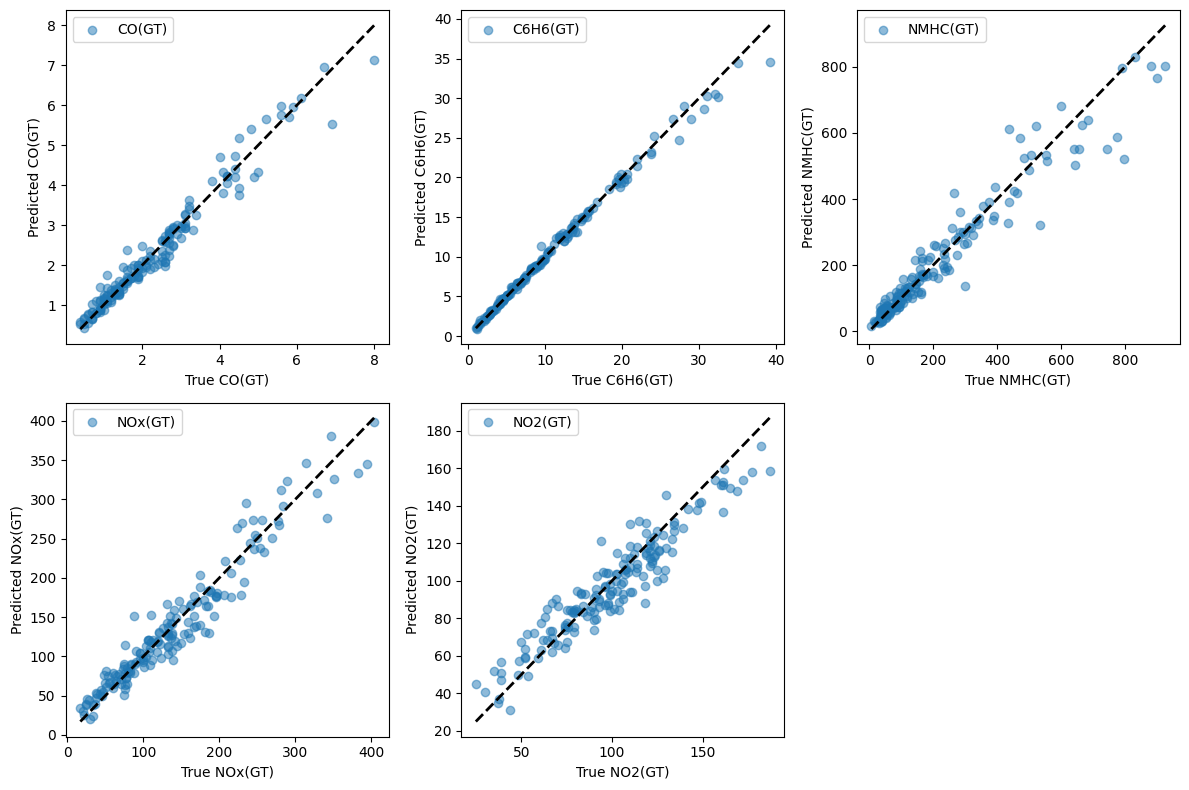

In [5]:
plt.figure(figsize=(12, 8))

# True vs Predicted values for CO(GT)
plt.subplot(2, 3, 1)
plt.scatter(y_test['CO(GT)'], y_pred_rf[:, 0], label='CO(GT)', alpha=0.5)
plt.plot([y_test['CO(GT)'].min(), y_test['CO(GT)'].max()],
         [y_test['CO(GT)'].min(), y_test['CO(GT)'].max()], 'k--', lw=2)
plt.xlabel('True CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.legend()

# True vs Predicted values for C6H6(GT)
plt.subplot(2, 3, 2)
plt.scatter(y_test['C6H6(GT)'], y_pred_rf[:, 1], label='C6H6(GT)', alpha=0.5)
plt.plot([y_test['C6H6(GT)'].min(), y_test['C6H6(GT)'].max()],
         [y_test['C6H6(GT)'].min(), y_test['C6H6(GT)'].max()], 'k--', lw=2)
plt.xlabel('True C6H6(GT)')
plt.ylabel('Predicted C6H6(GT)')
plt.legend()

# True vs Predicted values for NMHC(GT)
plt.subplot(2, 3, 3)
plt.scatter(y_test['NMHC(GT)'], y_pred_rf[:, 2], label='NMHC(GT)', alpha=0.5)
plt.plot([y_test['NMHC(GT)'].min(), y_test['NMHC(GT)'].max()],
         [y_test['NMHC(GT)'].min(), y_test['NMHC(GT)'].max()], 'k--', lw=2)
plt.xlabel('True NMHC(GT)')
plt.ylabel('Predicted NMHC(GT)')
plt.legend()

# True vs Predicted values for NOx(GT)
plt.subplot(2, 3, 4)
plt.scatter(y_test['NOx(GT)'], y_pred_rf[:, 3], label='NOx(GT)', alpha=0.5)
plt.plot([y_test['NOx(GT)'].min(), y_test['NOx(GT)'].max()],
         [y_test['NOx(GT)'].min(), y_test['NOx(GT)'].max()], 'k--', lw=2)
plt.xlabel('True NOx(GT)')
plt.ylabel('Predicted NOx(GT)')
plt.legend()

# True vs Predicted values for NO2(GT)
plt.subplot(2, 3, 5)
plt.scatter(y_test['NO2(GT)'], y_pred_rf[:, 4], label='NO2(GT)', alpha=0.5)
plt.plot([y_test['NO2(GT)'].min(), y_test['NO2(GT)'].max()],
         [y_test['NO2(GT)'].min(), y_test['NO2(GT)'].max()], 'k--', lw=2)
plt.xlabel('True NO2(GT)')
plt.ylabel('Predicted NO2(GT)')
plt.legend()

plt.tight_layout()
plt.show()


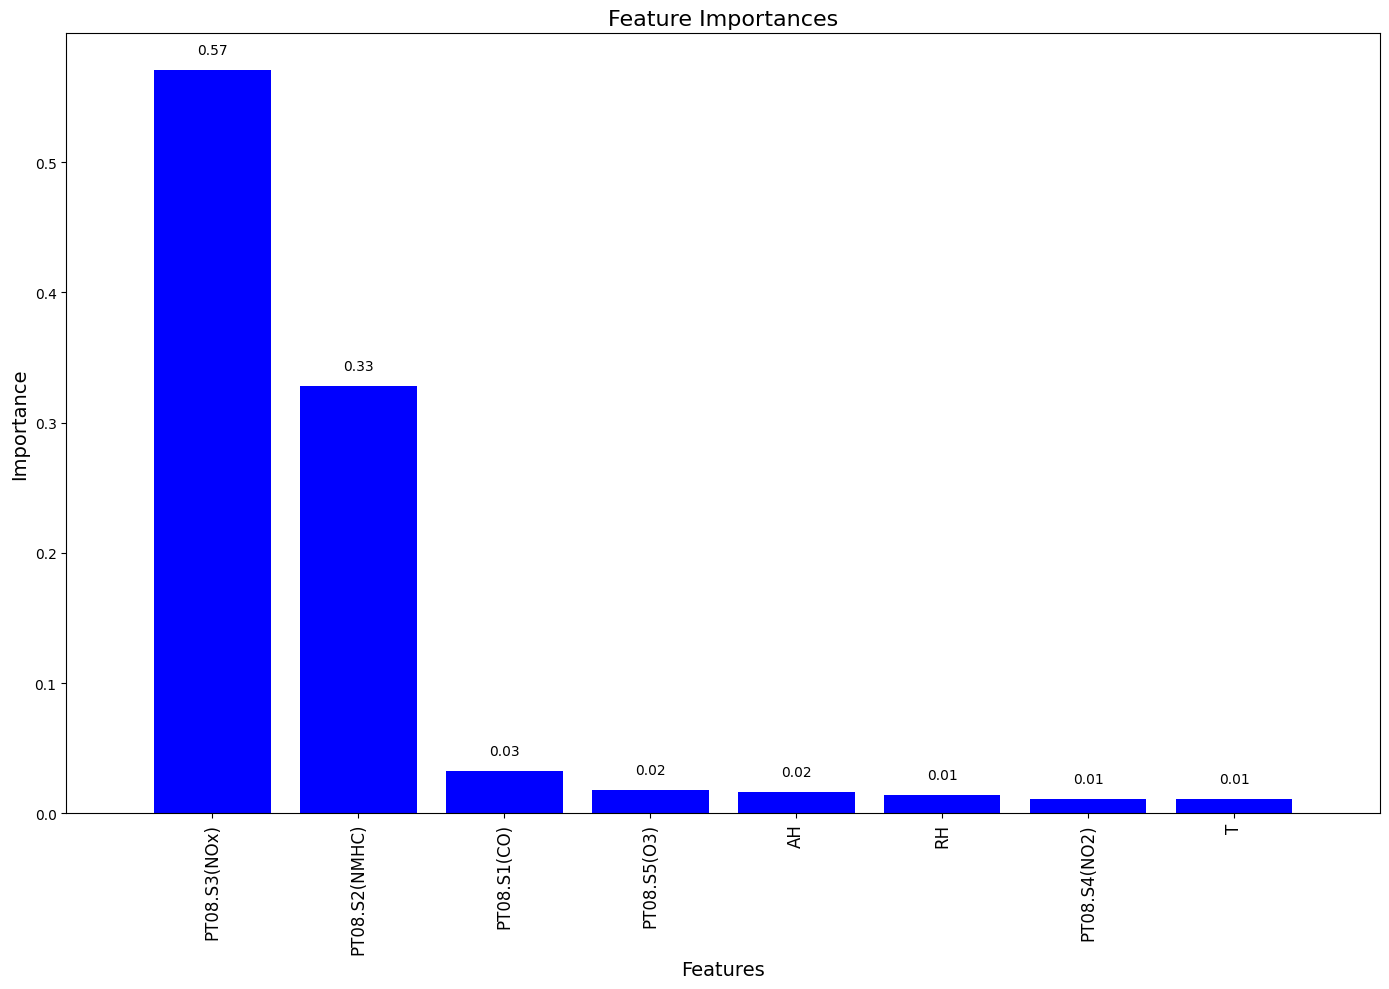

In [6]:
import numpy as np
import matplotlib.pyplot as plt



# Feature importances from the random forest model
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 10))
plt.title('Feature Importances', fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()

# Annotate the bars with the importance values
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


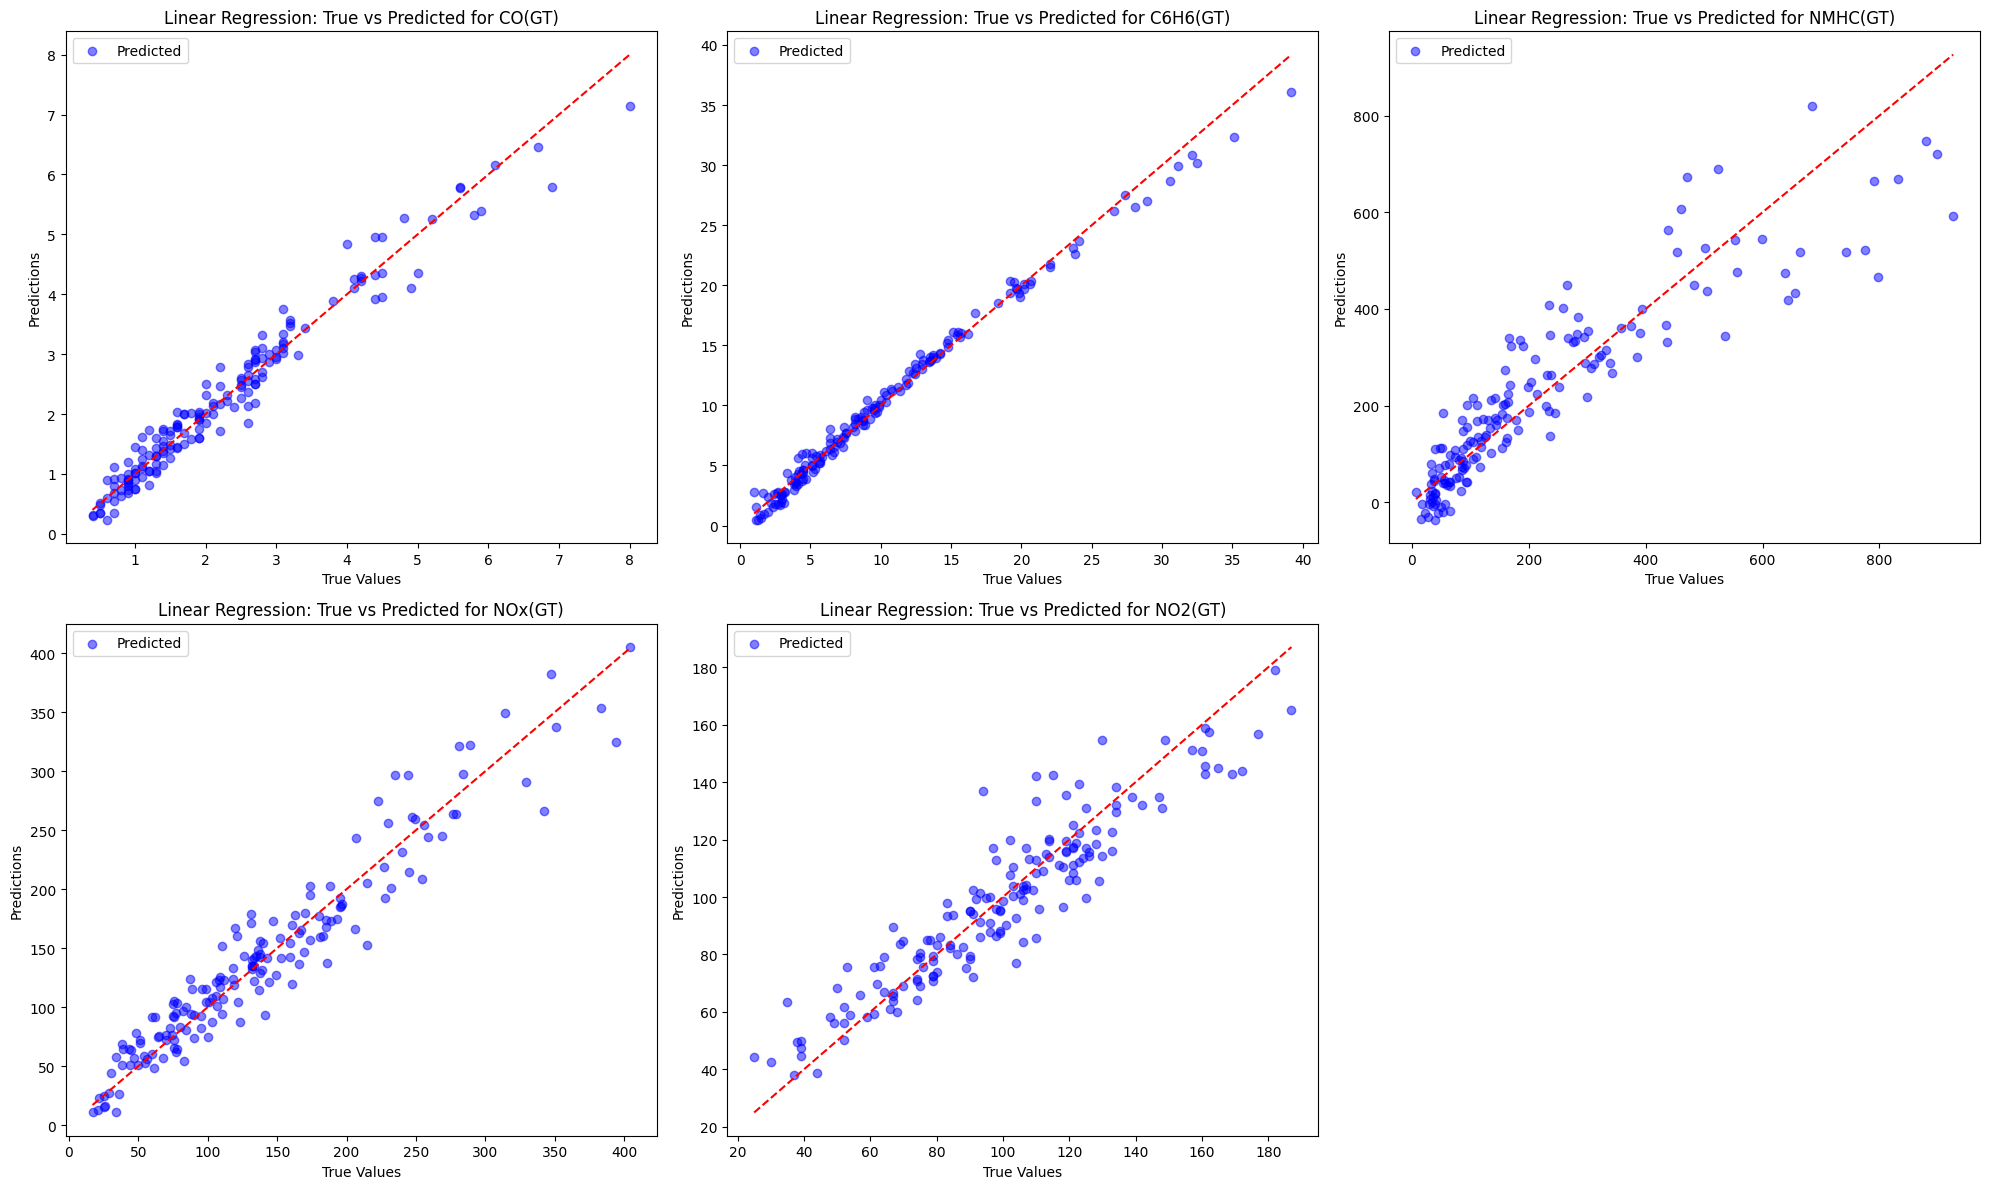

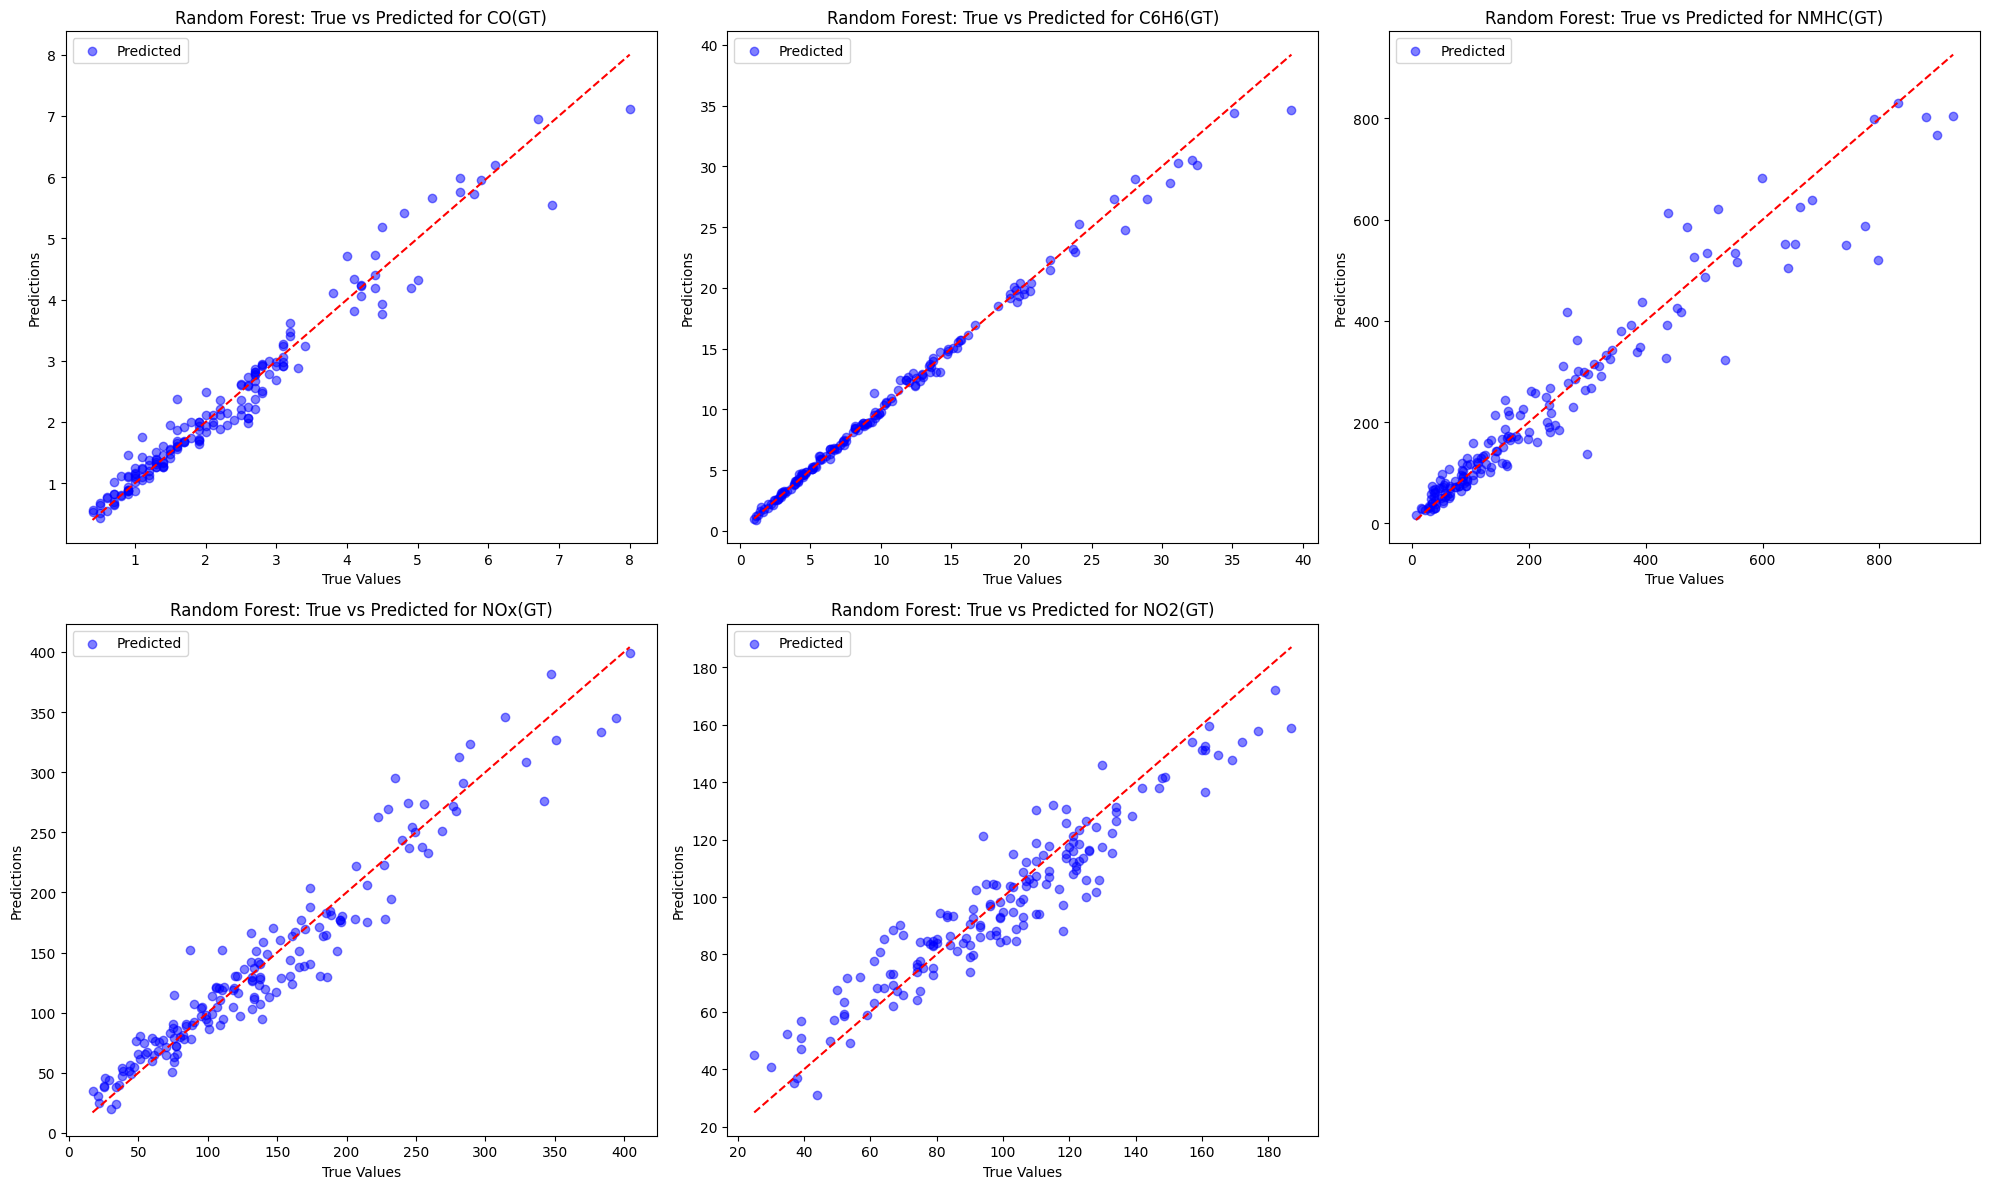

In [7]:
# Plotting True vs Predicted values for Linear Regression
plt.figure(figsize=(20, 12))

for i, col in enumerate(y_test.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test[col], y_pred_lr[:, i], alpha=0.5, color='b', label='Predicted')
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Linear Regression: True vs Predicted for {col}')
    plt.legend()
    plt.tight_layout()

plt.show()

# Plotting True vs Predicted values for Random Forest
plt.figure(figsize=(20, 12))

for i, col in enumerate(y_test.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test[col], y_pred_rf[:, i], alpha=0.5, color='b', label='Predicted')
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Random Forest: True vs Predicted for {col}')
    plt.legend()
    plt.tight_layout()

plt.show()

The scatter plots for Linear Regression show the true values (ground truth) against the predicted values for each parameter.
The red dashed line represents the perfect 1:1 relationship where the predicted values exactly match the true values.
If the points are closely clustered around the red dashed line, it indicates a good fit by the model. If the points are spread out, it indicates a poorer fit.

Random Forest can capture more complex patterns in the data, so look for any non-linear relationships that are better captured by this model.

My conclusion on the best model is Random Forest.

# Part 2:

The dataset for training and testing your methods can be downloaded from the Teams group. The goal of this dataset is to classify people described by a set of attributes as good or bad credit risks. you will find two files:

    - data.txt: provides the examples with the last column for class category (1 or 2)
    - readme.data.txt: describes the information regarding this dataset
    
    1- Propose two differents methods to solve this problem, you should compare the performance of the classification. you must show all the experiments that you have made.

    2- Propose a solution to improve the resulting performances.

# Data preprocessing

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import os 

# Load the data
data = pd.read_csv('./Part2data/data.txt', delimiter=' ', header=None)

data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [9]:
# Select features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## First Method:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{confusion_lr}")
print(f"Classification Report:\n{report_lr}")


Logistic Regression Accuracy: 0.8
Confusion Matrix:
[[107  13]
 [ 19  21]]
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.89      0.87       120
           2       0.62      0.53      0.57        40

    accuracy                           0.80       160
   macro avg       0.73      0.71      0.72       160
weighted avg       0.79      0.80      0.79       160



Analysis:

- Logistic Regression performs well with an overall accuracy of 80%.
- The model performs better for class 1 (good credit risk) with high precision (0.85) and recall (0.89).
Performance for class 2 (bad credit risk) is lower, with precision at 0.62 and recall at 0.53.

## Second Method:

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print(f"Classification Report:\n{report_rf}")


Random Forest Accuracy: 0.75
Confusion Matrix:
[[107  13]
 [ 27  13]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.89      0.84       120
           2       0.50      0.33      0.39        40

    accuracy                           0.75       160
   macro avg       0.65      0.61      0.62       160
weighted avg       0.72      0.75      0.73       160



Analysis:

- Random Forest has a slightly lower accuracy of 75%.
- Performance for class 1 is decent with precision (0.80) and recall (0.89).
- Performance for class 2 is quite low, with precision at 0.50 and recall at 0.33.

Performance Comparison:

- Logistic Regression outperforms Random Forest in terms of overall accuracy and particularly in classifying class 2 (bad credit risk).
- Random Forest does not capture the patterns for class 2 as effectively as Logistic Regression.

### Experiments to improve the performance of classifications

Feature Engineering:

- Create new features based on domain knowledge that might better capture the underlying patterns.
- Perform feature selection to remove irrelevant or redundant features that might be adding noise to the models.

Hyperparameter Tuning:

- For Logistic Regression, use GridSearchCV to find optimal values for hyperparameters such as C (inverse of regularization strength).
- For Random Forest, tune parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf

In [12]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)

best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_scaled)

accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
confusion_best_lr = confusion_matrix(y_test, y_pred_best_lr)
report_best_lr = classification_report(y_test, y_pred_best_lr)

print(f"Optimized Logistic Regression Accuracy: {accuracy_best_lr}")
print(f"Confusion Matrix:\n{confusion_best_lr}")
print(f"Classification Report:\n{report_best_lr}")


Optimized Logistic Regression Accuracy: 0.79375
Confusion Matrix:
[[107  13]
 [ 20  20]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.89      0.87       120
           2       0.61      0.50      0.55        40

    accuracy                           0.79       160
   macro avg       0.72      0.70      0.71       160
weighted avg       0.78      0.79      0.79       160



The optimized Logistic Regression model has an accuracy of 79.38%, which is slightly lower than the previous accuracy of 80%. This indicates that hyperparameter tuning did not significantly impact the overall accuracy.

In [14]:
# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
confusion_best_rf = confusion_matrix(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Optimized Random Forest Accuracy: {accuracy_best_rf}")
print(f"Confusion Matrix:\n{confusion_best_rf}")
print(f"Classification Report:\n{report_best_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimized Random Forest Accuracy: 0.75625
Confusion Matrix:
[[106  14]
 [ 25  15]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.84       120
           2       0.52      0.38      0.43        40

    accuracy                           0.76       160
   macro avg       0.66      0.63      0.64       160
weighted avg       0.74      0.76      0.74       160



The optimized Random Forest model has an accuracy of 75.63%. This is comparable to the previous accuracy of 75%, indicating a slight improvement.

So after the optimizing results we can clearly see there is a class imbalance in both classification methods.The dataset may be imbalanced, with more instances of class 1 than class 2. This imbalance could affect the model's ability to learn patterns for the minority class (class 2).
Techniques such as oversampling the minority class (SMOTE) or undersampling the majority class can help address this imbalance.

### Adressing the class imbalance and using ensemble methods

For Logistic regression

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Train the model on the resampled dataset
lr_resampled = LogisticRegression(max_iter=1000)
lr_resampled.fit(X_res, y_res)
y_pred_resampled = lr_resampled.predict(X_test_scaled)

# Evaluate the resampled model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
confusion_resampled = confusion_matrix(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)

print(f"Resampled Logistic Regression Accuracy: {accuracy_resampled}")
print(f"Confusion Matrix:\n{confusion_resampled}")
print(f"Classification Report:\n{report_resampled}")


Resampled Logistic Regression Accuracy: 0.7375
Confusion Matrix:
[[88 32]
 [10 30]]
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.73      0.81       120
           2       0.48      0.75      0.59        40

    accuracy                           0.74       160
   macro avg       0.69      0.74      0.70       160
weighted avg       0.79      0.74      0.75       160



In [18]:

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging
bagging_clf = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50, random_state=42)
bagging_clf.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(X_test_scaled)

# Evaluate Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
confusion_bagging = confusion_matrix(y_test, y_pred_bagging)
report_bagging = classification_report(y_test, y_pred_bagging)

print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(f"Confusion Matrix:\n{confusion_bagging}")
print(f"Classification Report:\n{report_bagging}")

# Boosting
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train_scaled, y_train)
y_pred_boosting = boosting_clf.predict(X_test_scaled)

# Evaluate Boosting Classifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
confusion_boosting = confusion_matrix(y_test, y_pred_boosting)
report_boosting = classification_report(y_test, y_pred_boosting)

print(f"Boosting Classifier Accuracy: {accuracy_boosting}")
print(f"Confusion Matrix:\n{confusion_boosting}")
print(f"Classification Report:\n{report_boosting}")


Bagging Classifier Accuracy: 0.80625
Confusion Matrix:
[[107  13]
 [ 18  22]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.89      0.87       120
           2       0.63      0.55      0.59        40

    accuracy                           0.81       160
   macro avg       0.74      0.72      0.73       160
weighted avg       0.80      0.81      0.80       160

Boosting Classifier Accuracy: 0.76875
Confusion Matrix:
[[103  17]
 [ 20  20]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       120
           2       0.54      0.50      0.52        40

    accuracy                           0.77       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.76      0.77      0.77       160



c:\Users\sanja\anaconda3\envs\my-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The Bagging Classifier with Logistic Regression as the base estimator demonstrated the highest accuracy and balanced performance across both classes.

For Random Forest

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Train the model on the resampled dataset
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_res, y_res)
y_pred_resampled = rf_resampled.predict(X_test_scaled)

# Evaluate the resampled model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
confusion_resampled = confusion_matrix(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)

print(f"Resampled Random Forest Accuracy: {accuracy_resampled}")
print(f"Confusion Matrix:\n{confusion_resampled}")
print(f"Classification Report:\n{report_resampled}")


Resampled Random Forest Accuracy: 0.7875
Confusion Matrix:
[[103  17]
 [ 17  23]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86       120
           2       0.57      0.57      0.57        40

    accuracy                           0.79       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.79      0.79      0.79       160



In [24]:
# 2. Bagging Classifier
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=50, random_state=42)
bagging_clf.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
confusion_bagging = confusion_matrix(y_test, y_pred_bagging)
report_bagging = classification_report(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(f"Confusion Matrix:\n{confusion_bagging}")
print(f"Classification Report:\n{report_bagging}")

# 3. Boosting Classifier
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train_scaled, y_train)
y_pred_boosting = boosting_clf.predict(X_test_scaled)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
confusion_boosting = confusion_matrix(y_test, y_pred_boosting)
report_boosting = classification_report(y_test, y_pred_boosting)
print(f"Boosting Classifier Accuracy: {accuracy_boosting}")
print(f"Confusion Matrix:\n{confusion_boosting}")
print(f"Classification Report:\n{report_boosting}")

Bagging Classifier Accuracy: 0.75
Confusion Matrix:
[[106  14]
 [ 26  14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.88      0.84       120
           2       0.50      0.35      0.41        40

    accuracy                           0.75       160
   macro avg       0.65      0.62      0.63       160
weighted avg       0.73      0.75      0.73       160

Boosting Classifier Accuracy: 0.76875
Confusion Matrix:
[[103  17]
 [ 20  20]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       120
           2       0.54      0.50      0.52        40

    accuracy                           0.77       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.76      0.77      0.77       160



c:\Users\sanja\anaconda3\envs\my-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The Boosting Classifier outperformed the Bagging Classifier in terms of accuracy (0.76875 vs 0.75).
The precision and recall for class 2 are higher for the Boosting Classifier compared to the Bagging Classifier.
The Boosting Classifier showed better balance between the two classes, though class 2 still has lower metrics compared to class 1.

## Conclusions and Perspectives:

1. Addressing Class Imbalance

Imbalanced datasets can lead to models that are biased towards the majority class. This means that the model will perform well on the majority class but poorly on the minority class. In the context of credit risk, this could result in a failure to accurately identify bad credit risks, which is crucial for making informed financial decisions.

### Methods:

SMOTE (Synthetic Minority Over-sampling Technique):

 SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This helps to balance the class distribution without simply duplicating existing samples.
Benefit: Improves the model's ability to learn the characteristics of the minority class, leading to better recall and precision for that class.

Undersampling:

This technique involves reducing the number of samples in the majority class to balance the class distribution.
Benefit: Helps to prevent the model from becoming biased towards the majority class, although it can lead to a loss of information if too many majority class samples are removed.

After resampling I checked the performance of the two models. And then i used ensemble method in order to incerase the accuracy for the second class.Bagging focuses on reducing variance and avoiding overfitting by training multiple models on different subsets of the data.
Boosting aims to reduce bias by sequentially training models, each attempting to correct the errors of its predecessor.

Key perspectives I gathered from these steps:

Bagging:

- For both logistic regression and random forest, bagging showed slight improvements in accuracy or maintained consistent performance.
- The method effectively enhanced model stability and reduced variance but did not significantly improve the minority class (class 2) performance.

Boosting:

- Boosting notably improved the performance of logistic regression and random forest classifiers.
- It demonstrated better precision and recall for the minority class, showcasing its ability to address bias and enhance overall predictive power.
- Boosting's sequential approach helps focus on difficult-to-classify instances, leading to a balanced performance across classes.